Load in data tables and format them into F Data Grids

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
root = os.getcwd()
dataroot = r'C:\Users\George\Documents\Python Scripts\FDA\Letters\Data'

In [4]:
#locate and read data files
os.chdir(dataroot)
xdata,ydata = pd.read_csv('xdata_abc.csv'),pd.read_csv('ydata_abc.csv')
xdata.head()

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,0.806452,0.765161,0.734194,0.865806,0.708387,0.749677,0.744516,0.716129,0.705806,0.760000,...,0.685161,0.721290,0.569032,0.790968,0.651613,0.775484,0.762581,0.584516,0.736774,0.579355
1,0.806452,0.680000,0.685161,0.809032,0.674839,0.726452,0.710968,0.698065,0.625806,0.718710,...,0.587097,0.695484,0.507097,0.762581,0.633548,0.741935,0.734194,0.522581,0.705806,0.543226
2,0.765161,0.594839,0.602581,0.723871,0.630968,0.667097,0.659355,0.669677,0.561290,0.638710,...,0.509677,0.664516,0.421935,0.734194,0.584516,0.708387,0.705806,0.458065,0.643871,0.486452
3,0.680000,0.486452,0.538065,0.630968,0.576774,0.594839,0.600000,0.623226,0.499355,0.550968,...,0.440000,0.625806,0.378065,0.700645,0.548387,0.669677,0.672258,0.393548,0.576774,0.440000
4,0.615484,0.421935,0.486452,0.532903,0.543226,0.522581,0.532903,0.587097,0.432258,0.489032,...,0.378065,0.587097,0.310968,0.646452,0.509677,0.625806,0.628387,0.334194,0.527742,0.401290


To use FDataGrids, each column should be of equal length.
To acheive this the readdata class will be used to get the smoothed data each of equal vector legnth.

In [6]:
from Letters.readdata import letterData

In [7]:
letterdata = letterData('xdata_abc.csv','ydata_abc.csv')

In [9]:
#return to original directory
os.chdir(root)

In [21]:
#take all X data, and use Xsmooth with evenly sized vectors by using the SplEv tool
from scipy import interpolate
Bspline_coeff = letterdata.coefficients
X = pd.DataFrame(np.zeros(letterdata.x.shape),columns = letterdata.x.columns)
for i,col in enumerate(X.columns):
    X[col] = interpolate.splev(
        np.linspace(0,np.sum(~letterdata.x[col].isnull()) - 1,50),
        (Bspline_coeff['tx'].iloc[i],Bspline_coeff['cx'].iloc[i],Bspline_coeff['kx'].iloc[i]))

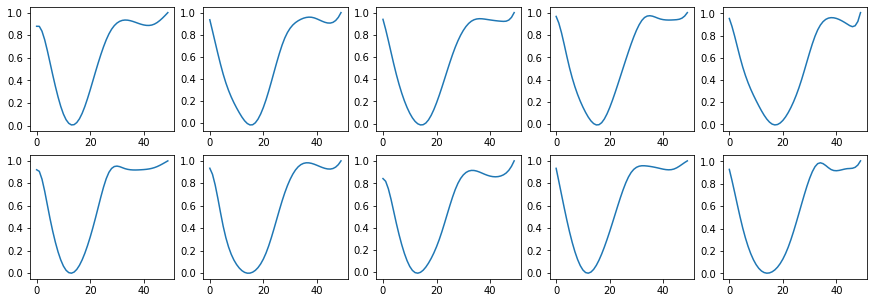

In [25]:
#check visuals are coherent for 'a0-9' values
fig,axes = plt.subplots(2,5,figsize = (15,5))
for i in range(10):
    axes[i//5,i%5].plot(np.arange(50),X['a{}'.format(i)])

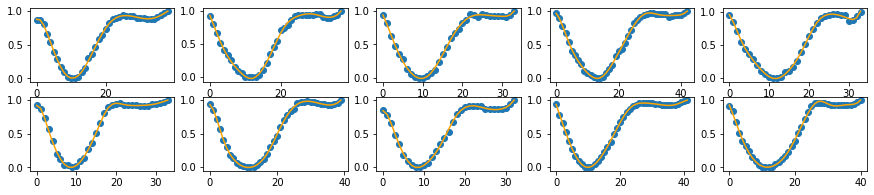

In [27]:
#compared to original values
letterdata.single_plotx()

Place in FDataGrid

In [39]:
from skfda.representation.grid import FDataGrid

X_data_matrix = [np.array(X[col]) for col in X.columns]
X_grid_points = [i for i in range(X.shape[0])]
X_FData = FDataGrid(X_data_matrix,X_grid_points,
                   dataset_name = 'Xletterdata_abc',
                   argument_names = ('time',),
                   coordinate_names = ('x_position',)
                   )
X_FData

FDataGrid(
    array([[[0.87828924],
            [0.87776323],
            [0.83459993],
            ...,
            [0.95064368],
            [0.97430251],
            [0.99926836]],
    
           [[0.93638992],
            [0.83541622],
            [0.73219906],
            ...,
            [0.92949889],
            [0.95816259],
            [1.001373  ]],
    
           [[0.93974368],
            [0.8495859 ],
            [0.7490728 ],
            ...,
            [0.93347287],
            [0.95745935],
            [1.00053653]],
    
           ...,
    
           [[0.68723162],
            [0.63230418],
            [0.56572324],
            ...,
            [0.95369139],
            [0.9756885 ],
            [0.99983375]],
    
           [[0.91331707],
            [0.86603812],
            [0.80273327],
            ...,
            [0.87625802],
            [0.93416169],
            [1.00231262]],
    
           [[0.70217886],
            [0.64968208],
            [0.584413

In [53]:
#Define categories for FDA
y = [c[0] for c in X.columns]
mapping = {'a':0,'b':1,'c':2}
categories = [*mapping]
y = np.array([mapping[l] for l in y])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [51]:
from sklearn.model_selection import train_test_split
from skfda.datasets import fetch_growth
from skfda.exploratory.depth import ModifiedBandDepth
from skfda.exploratory.stats.covariance import ParametricGaussianCovariance
from skfda.misc.covariances import Gaussian
from skfda.ml.classification import (
    KNeighborsClassifier,
    MaximumDepthClassifier,
    NearestCentroid,
    QuadraticDiscriminantAnalysis,
)

The number of a samples is 7
The number of b samples is 7
The number of c samples is 7


C:\Users\George\AppData\Local\Temp\ipykernel_2648\2945169423.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  X_train.plot(group = y_train, group_names = categories).show()


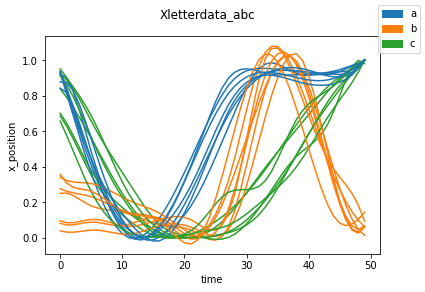

In [58]:
#split test train - ensure with random state equal split of categories
X_train,X_test,y_train,y_test = train_test_split(
    X_FData,
    y,
    test_size = 0.3,
    stratify = y,
    random_state = 7)

#Check for correct representation
print('The number of a samples is {}'.format(np.sum(y_train == 0)))
print('The number of b samples is {}'.format(np.sum(y_train == 1)))
print('The number of c samples is {}'.format(np.sum(y_train == 2)))

#Plot samples grouped by categories
X_train.plot(group = y_train, group_names = categories).show()

In [59]:
depth = MaximumDepthClassifier(depth_method=ModifiedBandDepth())
depth.fit(X_train, y_train)
depth_pred = depth.predict(X_test)
print(depth_pred)
print('The score of Maximum Depth Classifier is {0:2.2%}'.format(
    depth.score(X_test, y_test),
))

[2 2 1 2 0 1 0 2 2]
The score of Maximum Depth Classifier is 77.78%


In [60]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(knn_pred)
print('The score of KNN is {0:2.2%}'.format(knn.score(X_test, y_test)))

[2 1 1 2 0 1 0 0 2]
The score of KNN is 100.00%


In [61]:
centroid = NearestCentroid()
centroid.fit(X_train, y_train)
centroid_pred = centroid.predict(X_test)
print(centroid_pred)
print('The score of Nearest Centroid Classifier is {0:2.2%}'.format(
    centroid.score(X_test, y_test),
))

[2 1 1 2 0 1 0 0 2]
The score of Nearest Centroid Classifier is 100.00%


In [63]:
#use relevant variance and legnth scale
qda = QuadraticDiscriminantAnalysis(
    ParametricGaussianCovariance(
        Gaussian(variance=0.2, length_scale=0.1),
    ),
    regularizer=0.05,
)
qda.fit(X_train, y_train)
qda_pred = qda.predict(X_test)
print(qda_pred)
print('The score of functional QDA is {0:2.2%}'.format(
    qda.score(X_test, y_test),
))

[2 1 1 2 0 1 0 0 2]
The score of functional QDA is 100.00%


In [64]:
accuracies = pd.DataFrame({
    'Classification methods':
        [
            'Maximum Depth Classifier',
            'K-Nearest-Neighbors',
            'Nearest Centroid Classifier',
            'Functional QDA',
        ],
    'Accuracy':
        [
            '{0:2.2%}'.format(
                depth.score(X_test, y_test),
            ),
            '{0:2.2%}'.format(
                knn.score(X_test, y_test),
            ),
            '{0:2.2%}'.format(
                centroid.score(X_test, y_test),
            ),
            '{0:2.2%}'.format(
                qda.score(X_test, y_test),
            ),
        ],
})

accuracies

,Classification methods,Accuracy
0,Maximum Depth Classifier,77.78%
1,K-Nearest-Neighbors,100.00%
2,Nearest Centroid Classifier,100.00%
3,Functional QDA,100.00%


The models perform particularly well, although this is a very easy application. Depth classifier does not work well...

The only other model in the classification part of ml is classification. This 

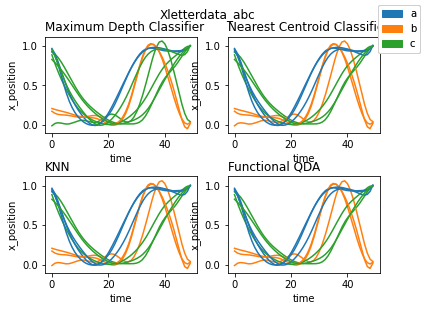

In [65]:
fig, axs = plt.subplots(2, 2)
plt.subplots_adjust(hspace=0.45, bottom=0.06)

X_test.plot(group=centroid_pred, group_names=categories, axes=axs[0][1])
axs[0][1].set_title('Nearest Centroid Classifier', loc='left')

X_test.plot(group=depth_pred, group_names=categories, axes=axs[0][0])
axs[0][0].set_title('Maximum Depth Classifier', loc='left')

X_test.plot(group=knn_pred, group_names=categories, axes=axs[1][0])
axs[1][0].set_title('KNN', loc='left')

X_test.plot(group=qda_pred, group_names=categories, axes=axs[1][1])
axs[1][1].set_title('Functional QDA', loc='left')

plt.show()

## Clustering

The existing clustering methods I can use are
- **FuzzyCMeans**
- **KMeans**

In [66]:
from skfda.exploratory.visualization.clustering import (
    ClusterMembershipLinesPlot,
    ClusterMembershipPlot,
    ClusterPlot,
)
from skfda.ml.clustering import FuzzyCMeans, KMeans

In [71]:
#Clustering is successful (only randomising order of clusters)
n_clusters = 3
seed = 0

kmeans = KMeans(n_clusters=n_clusters, random_state = seed)
kmeans.fit(X_FData)
print(kmeans.predict(X_FData))

[0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1]


In [87]:
colormap = plt.cm.get_cmap('tab10')
cluster_colors = colormap([0,2,1])
cluster_colors

array([[0.12156863, 0.46666667, 0.70588235, 1.        ],
       [0.17254902, 0.62745098, 0.17254902, 1.        ],
       [1.        , 0.49803922, 0.05490196, 1.        ]])

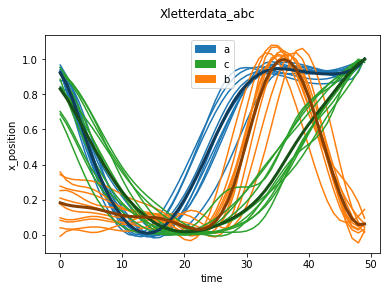

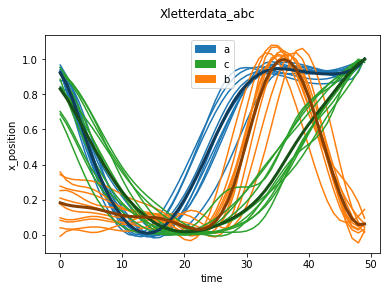

In [88]:
colormap = plt.cm.get_cmap('tab10')
cluster_colors = colormap([0,2,1])
cluster_labels = ['a','c','b']

ClusterPlot(kmeans,X_FData,cluster_colors = cluster_colors,cluster_labels=cluster_labels).plot()

Here the centre of the cluster is plotted with estimator.cluster_centers_

Unsure of how the cluster centroids are found.

In [90]:
fuzzy_kmeans = FuzzyCMeans(n_clusters=n_clusters,random_state=seed)
fuzzy_kmeans.fit(X_FData)
print(fuzzy_kmeans.predict(X_FData))

[0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1]


In [101]:
#Define sample colours for cluster plot (this time all X needs a colour)
color_byletter = [cluster_colors[i] for i in fuzzy_kmeans.predict(X_FData)]
color_byletter

[array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 array([1.        , 0.49803922, 0.05490196, 1.        ]),
 array([1.        , 0.49803922, 0.05490196, 1.        ]),
 array([1.        , 0.49803922, 0.05490196, 1.        ]),
 array([1.        , 0.49803922, 0.05490196, 1.        ]),
 array([1.        , 0.49803922, 0.05490196, 1.        ]),
 array([1.        , 0.49803922, 0.05490196, 1.        ]),
 array([1.        , 0.49803922, 0.05490196, 1.        ]),
 array([1.    

Here we can see how much each entry resembles each cluster with a membershiplinesplot

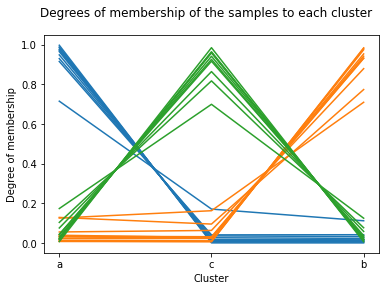

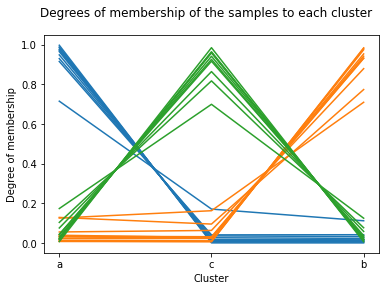

In [102]:
#Visualise how much each plot resembles centroid
ClusterMembershipLinesPlot(fuzzy_kmeans,X_FData,cluster_labels=cluster_labels,
                          sample_colors = color_byletter).plot()

Here We see the same thing but in barplot form

*The documentation shows how we might be able to sort bars according to their clusters*

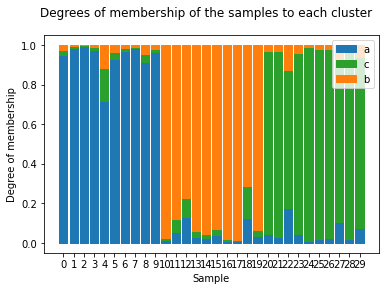

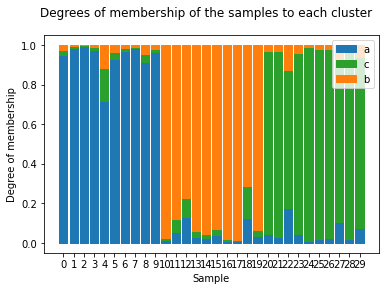

In [103]:
ClusterMembershipPlot(fuzzy_kmeans, X_FData, cluster_colors = cluster_colors,
                     cluster_labels = cluster_labels).plot()

## FPCA

The next step is to perform functional PCA, whereby the principal components of the data can be separated.

In [104]:
from skfda.exploratory.visualization import FPCAPlot
from skfda.preprocessing.dim_reduction import FPCA
from skfda.representation.basis import (
    BSplineBasis,
    FourierBasis,
    MonomialBasis,
)

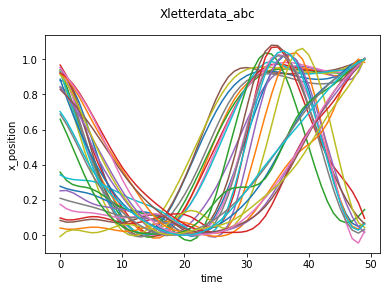

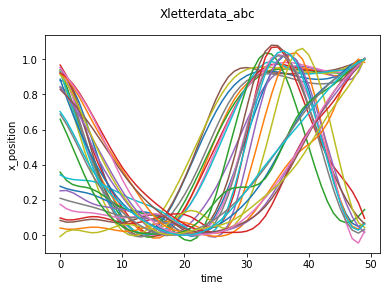

In [107]:
#reminder of original data
X_FData.plot()

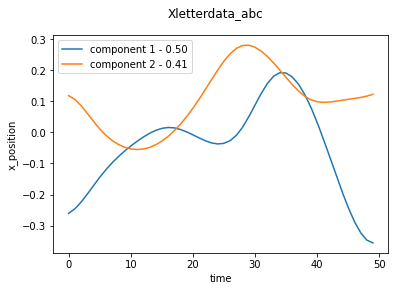

In [112]:
#2 Components in FPCA - just pass FDataGrid
fpca_discretized = FPCA(n_components=2)
fpca_discretized.fit(X_FData)
fpca_discretized.components_.plot()
plt.legend(labels=['component 1 - {:.2f}'.format(fpca_discretized.explained_variance_ratio_[0]),'component 2 - {:.2f}'.format(fpca_discretized.explained_variance_ratio_[1])])

In [117]:
import seaborn as sns

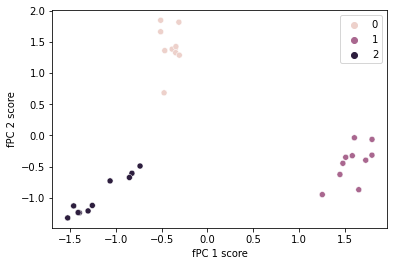

In [119]:
scores = fpca_discretized.fit_transform(X_FData)
sns.scatterplot(x=scores[:, 0], y=scores[:, 1],hue = y)
plt.xlabel("fPC 1 score")
plt.ylabel("fPC 2 score")
plt.title("")
plt.show()

## Using smoothed data as B-Spline

As we have already loaded the coefficients it should be possible to get the same result using a BSpline basis.

,tx,cx,kx,ty,cy,ky
0,"[0.0, 0.0, 0.0, 0.0, 4.0, 8.0, 13.0, 17.0, 21....","[0.8782892378409827, 0.920186481513338, 0.5307...",3,"[0.0, 0.0, 0.0, 0.0, 4.0, 8.0, 13.0, 17.0, 21....","[0.8994291738232869, 0.9273027742936728, 1.029...",3
1,"[0.0, 0.0, 0.0, 0.0, 4.0, 8.0, 12.0, 16.0, 21....","[0.9363899178379518, 0.7620420857682019, 0.361...",3,"[0.0, 0.0, 0.0, 0.0, 4.0, 8.0, 12.0, 16.0, 21....","[0.9113672225908582, 0.9908461500476924, 1.064...",3
2,"[0.0, 0.0, 0.0, 0.0, 3.0, 7.0, 11.0, 15.0, 18....","[0.9397436759407719, 0.8163762061348592, 0.404...",3,"[0.0, 0.0, 0.0, 0.0, 3.0, 7.0, 11.0, 15.0, 18....","[0.8153652915494489, 0.9232532761740642, 1.006...",3
3,"[0.0, 0.0, 0.0, 0.0, 4.0, 9.0, 14.0, 19.0, 23....","[0.9670414682591654, 0.9004469139453626, 0.439...",3,"[0.0, 0.0, 0.0, 0.0, 4.0, 9.0, 14.0, 19.0, 23....","[0.8008339954361142, 0.9118165018636084, 1.123...",3
4,"[0.0, 0.0, 0.0, 0.0, 3.0, 7.0, 11.0, 15.0, 18....","[0.953693738591443, 0.8625482995032672, 0.4663...",3,"[0.0, 0.0, 0.0, 0.0, 3.0, 7.0, 11.0, 15.0, 18....","[0.729566342565609, 0.8524392252173897, 0.8826...",3
5,"[0.0, 0.0, 0.0, 0.0, 3.0, 7.0, 11.0, 15.0, 18....","[0.9199742724509907, 0.9492839005485746, 0.444...",3,"[0.0, 0.0, 0.0, 0.0, 3.0, 7.0, 11.0, 15.0, 18....","[0.826445596261763, 0.8835323886973685, 1.0669...",3
6,"[0.0, 0.0, 0.0, 0.0, 4.0, 8.0, 13.0, 17.0, 22....","[0.9333688881025596, 0.8855697347537885, 0.317...",3,"[0.0, 0.0, 0.0, 0.0, 4.0, 8.0, 13.0, 17.0, 22....","[0.8163040240545998, 0.9529581573191812, 1.039...",3
7,"[0.0, 0.0, 0.0, 0.0, 3.0, 7.0, 11.0, 14.0, 18....","[0.8437150153319489, 0.8456573313360427, 0.387...",3,"[0.0, 0.0, 0.0, 0.0, 3.0, 7.0, 11.0, 14.0, 18....","[0.755306851967112, 0.7217976822215363, 1.0868...",3
8,"[0.0, 0.0, 0.0, 0.0, 4.0, 9.0, 14.0, 18.0, 23....","[0.9327410432418135, 0.750253269743323, 0.2976...",3,"[0.0, 0.0, 0.0, 0.0, 4.0, 9.0, 14.0, 18.0, 23....","[0.9095458661957506, 1.026229894659057, 1.1974...",3
9,"[0.0, 0.0, 0.0, 0.0, 4.0, 9.0, 13.0, 18.0, 22....","[0.9280611080413043, 0.7747054578130259, 0.316...",3,"[0.0, 0.0, 0.0, 0.0, 4.0, 9.0, 13.0, 18.0, 22....","[0.8339829333639114, 0.8879400768303319, 1.069...",3


In [127]:
B_coeffs = letterdata.coefficients['cx']
B_coeffs.iloc[0]

array([ 0.87828924,  0.92018648,  0.5307354 , -0.04532783, -0.00184537,
        0.48009652,  0.89467822,  0.95516013,  0.8924654 ,  0.87142458,
        0.95580566,  0.99926836,  0.        ,  0.        ,  0.        ,
        0.        ])

In [133]:
B_knots = letterdata.coefficients['tx'][0]
B_knots

array([ 0.,  0.,  0.,  0.,  4.,  8., 13., 17., 21., 26., 30., 34., 38.,
       38., 38., 38.])

In [129]:
from skfda.representation.basis import FDataBasis

In [136]:
#B coefficients are zero padded - remove last 4 values
B_coeffs = [letterdata.coefficients['cx'].iloc[i][:-4] for i in range(letterdata.coefficients.shape[0])]
#knots are quadrupled at start and end for 4th order
B_knots = tuple(np.unique(letterdata.coefficients['tx'].iloc[0]))

In [138]:
#manually input data for BSpline basis of functional data
basis_X_BSpline = FDataBasis(
    basis = BSplineBasis(domain_range=((np.min(knots),np.max(knots)),),
                        knots=B_knots),
    coefficients=B_coeffs)

## BSpline vs. Discretised

There is a very minor difference between the two, but overall it seems manually performing the B_Spline process is just as effective.

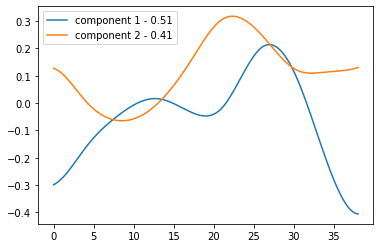

In [139]:
fpca = FPCA(n_components=2)
fpca.fit(basis_X_BSpline)
fpca.components_.plot()
plt.legend(labels=['component 1 - {:.2f}'.format(fpca.explained_variance_ratio_[0]),'component 2 - {:.2f}'.format(fpca.explained_variance_ratio_[1])])

### Mean plot to visualise both effects

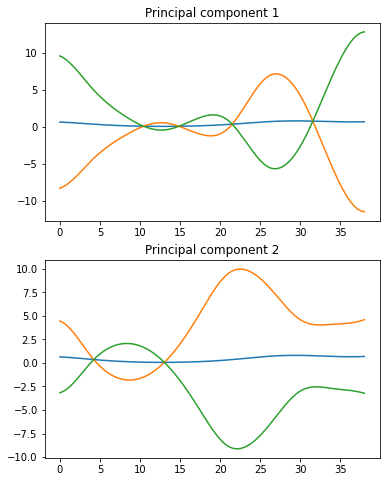

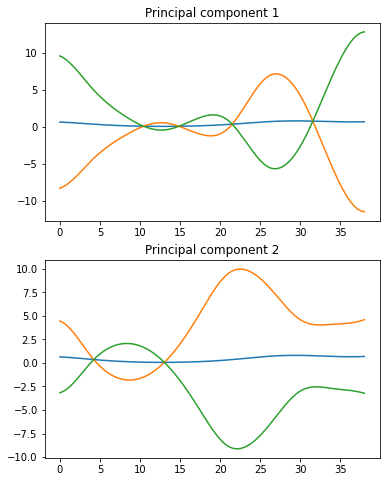

In [140]:
FPCAPlot(
    basis_X_BSpline.mean(),
    fpca.components_,
    factor=30,
    fig=plt.figure(figsize=(6, 2 * 4)),
    n_rows=2,
).plot()

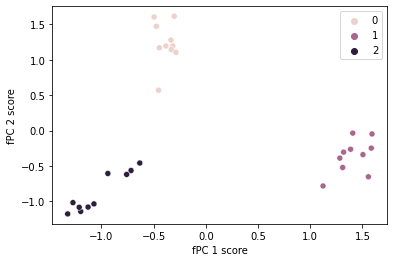

In [141]:
scores = fpca.fit_transform(basis_X_BSpline)
sns.scatterplot(x=scores[:, 0], y=scores[:, 1],hue = y)
plt.xlabel("fPC 1 score")
plt.ylabel("fPC 2 score")
plt.title("")
plt.show()

## Multivariate FPCA?

We have two different measure: **x** and **y**.